<a href="https://colab.research.google.com/github/AnnetVasileva/machineLearning/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import tensorflow as tf
from tensorflow import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [74]:
# read in data
path = '/content/drive/MyDrive/ML_ECO/'
pickle_file = 'train_set.pkl'

with open(path + pickle_file, 'rb') as f:
  train_set =pickle.load(f) 

X = train_set['X']
y = train_set['y']

In [129]:
# data processing
# maybe not needed
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X_train_full = scaler.transform(X)

In [130]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split( X_train_full, y, 
                                                    test_size=0.2, 
                                                    random_state=1,
                                                    stratify = y)


In [112]:
y_train.sum()/len(y_train)

0.04862782859894078

In [79]:
X_train

array([[  4.,  11., 213., ...,   4.,   4.,   4.],
       [  5.,   3., 175., ...,   4.,   4.,   4.],
       [  5.,   5., 423., ...,   5.,   5.,   5.],
       ...,
       [  7.,   3., 233., ...,   5.,   5.,   5.],
       [  8.,   8., 451., ...,   4.,   4.,   4.],
       [  6.,   8., 269., ...,   3.,   3.,   3.]])

In [117]:
y_vaild.sum()/len(y_vaild)

0.048459563543003854

In [132]:
#build basic model
model = keras.models.Sequential()
model.add(keras.layers.Dense(16,input_dim=X.shape[1],  activation="relu",  kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(rate=0.8))
model.add(keras.layers.Dense(16, activation="relu",  kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(1, activation="relu"))


In [133]:
# this should make sgd to be able to varry the learning rate
# taken from keras example
first_decay_steps = 100
initial_learning_rate = 0.1
lr_decayed_fn = (
  tf.keras.experimental.CosineDecayRestarts(
      initial_learning_rate,
      first_decay_steps))
opt = tf.keras.optimizers.SGD(learning_rate=lr_decayed_fn)

In [134]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=opt,
              #keras.optimizers.Adam(lr=0.01),
              metrics=["accuracy"])

In [135]:
history = model.fit(X_train, y_train, batch_size=30, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
416/416 [==============================] - 2s 3ms/step - loss: 1.0217 - accuracy: 0.9293 - val_loss: 0.7475 - val_accuracy: 0.9515
Epoch 2/50
416/416 [==============================] - 1s 3ms/step - loss: 0.7098 - accuracy: 0.9540 - val_loss: 0.7475 - val_accuracy: 0.9515
Epoch 3/50
416/416 [==============================] - 1s 3ms/step - loss: 0.7523 - accuracy: 0.9512 - val_loss: 0.7475 - val_accuracy: 0.9515
Epoch 4/50
416/416 [==============================] - 1s 3ms/step - loss: 0.7819 - accuracy: 0.9493 - val_loss: 0.7475 - val_accuracy: 0.9515
Epoch 5/50
416/416 [==============================] - 1s 3ms/step - loss: 0.7400 - accuracy: 0.9520 - val_loss: 0.7475 - val_accuracy: 0.9515
Epoch 6/50
416/416 [==============================] - 1s 3ms/step - loss: 0.7611 - accuracy: 0.9507 - val_loss: 0.7475 - val_accuracy: 0.9515
Epoch 7/50
416/416 [==============================] - 1s 3ms/step - loss: 0.7243 - accuracy: 0.9530 - val_loss: 0.7475 - val_accuracy: 0.9515
Epoch 

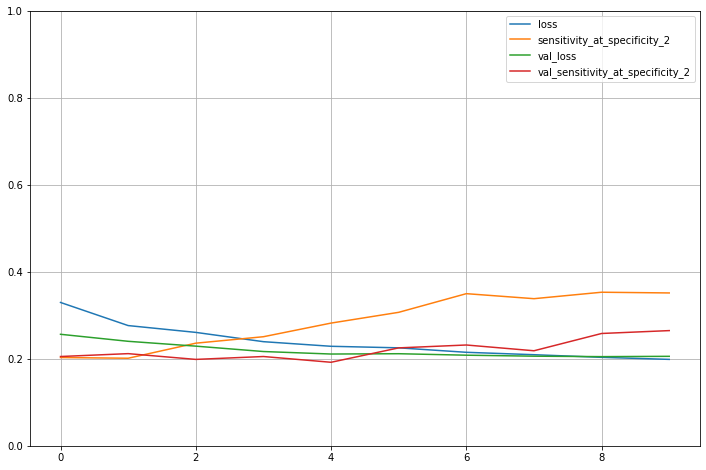

In [66]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

In [67]:
model.evaluate(X_valid, y_valid)

98/98 [==============================] - 0s 3ms/step - loss: 0.2057 - sensitivity_at_specificity_2: 0.2649


[0.20574957132339478, 0.26490065455436707]

In [68]:
results = 1*(model.predict(X_valid)>=0.5)

In [70]:
results

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [71]:
y_valid

array([0, 0, 0, ..., 0, 1, 0])